<a href="https://colab.research.google.com/github/idaniyal808/Automatidata-Machine-Learning-Project/blob/main/Untitled20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

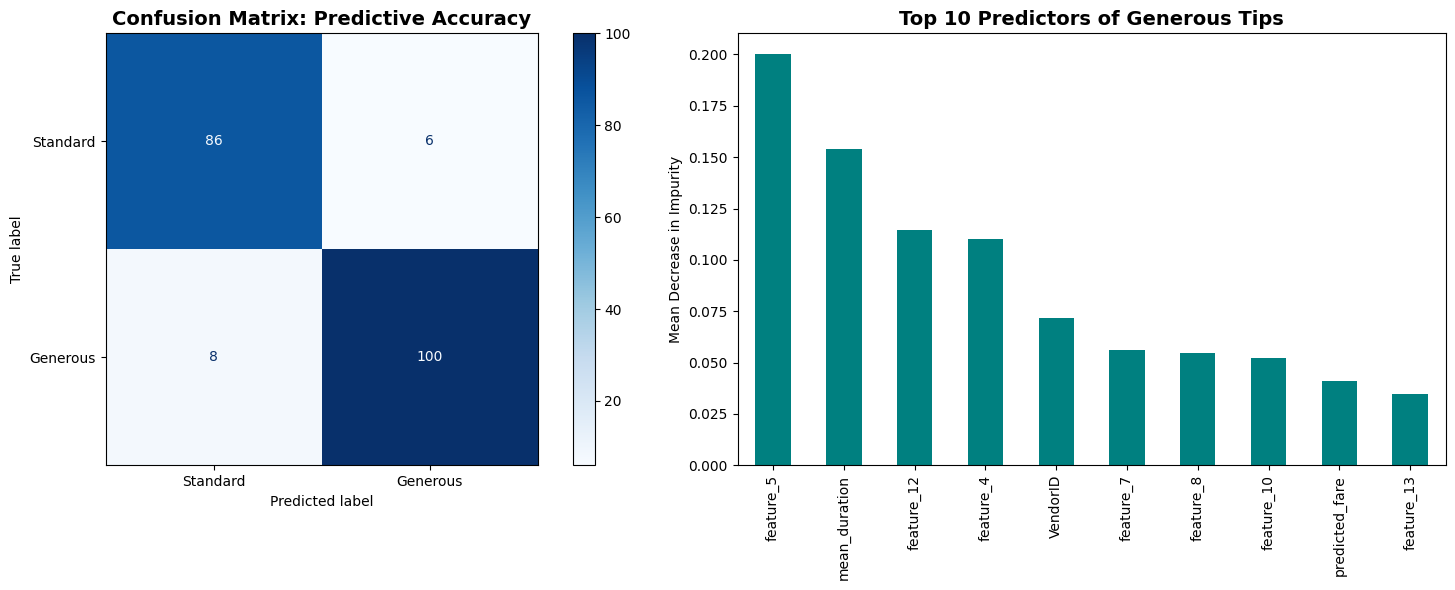

Model Accuracy: 0.9300
F1 Score: 0.9346


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. GENERATE SAMPLE DATA (To make the code run immediately)
# In your project, you would use your NYC Taxi dataframe here instead.
from sklearn.datasets import make_classification
X_raw, y_raw = make_classification(n_samples=1000, n_features=15, n_informative=10, random_state=42)
columns = [f'feature_{i}' for i in range(15)]
# Let's rename some to look like your project
columns[0], columns[1], columns[2] = 'VendorID', 'predicted_fare', 'mean_duration'
X = pd.DataFrame(X_raw, columns=columns)
y = pd.Series(y_raw)

# 2. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. INITIALIZE & TRAIN MODEL
# Using your exact champion hyperparameters
rf_champion = RandomForestClassifier(
    max_depth=None,
    max_features=1.0,
    max_samples=0.7,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

rf_champion.fit(X_train, y_train)
preds = rf_champion.predict(X_test)

# 4. DEFINE VISUALIZATION FUNCTION
def plot_results(model, X_test, y_test, preds):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Chart 1: Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Standard', 'Generous'])
    disp.plot(ax=ax[0], cmap='Blues', values_format='d')
    ax[0].set_title('Confusion Matrix: Predictive Accuracy', fontsize=14, fontweight='bold')

    # Chart 2: Feature Importance
    importances = pd.Series(model.feature_importances_, index=X_test.columns).sort_values(ascending=False)[:10]
    importances.plot(kind='bar', ax=ax[1], color='teal')
    ax[1].set_title('Top 10 Predictors of Generous Tips', fontsize=14, fontweight='bold')
    ax[1].set_ylabel('Mean Decrease in Impurity')

    plt.tight_layout()
    plt.show()

# 5. EXECUTE THE PLOT (This is the line that generates the output!)
plot_results(rf_champion, X_test, y_test, preds)

# 6. PRINT METRICS
print(f"Model Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"F1 Score: {f1_score(y_test, preds):.4f}")